In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json


# Import API key
from config import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
api_key_weather

'c64da98ced003e0895eef1988506b82a'

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [24]:
weather_info = ("City Name", "Country Code", "Rand Lat", "Rand Lng", "Latitude", "Longitude","Temp (F)", "Humidity (%)",
                "Cloudiness (%)","Wind Speed (mph)")
            
weather_info_df = pd.DataFrame(columns = weather_info)
weather_info_df


,City Name,Country Code,Rand Lat,Rand Lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [36]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).


#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key_weather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = url +"&units=" + units + "&q="
query_url = url + "appid=" + api_key_weather + "&units=" + units + "&q="

weather_data = requests.get(query_url).json()


In [37]:
search_data = []
city_list = []
country_list = []


search_count = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {search_count} for the city: {city}")
        search_count += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        countryyyy = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_list.append(city)
        country_list.append(countryyyy)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


#print("---------------------------------------")
#print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: orlik
Record found for city: orlik with city id: 1496073
Processing record 1 for the city: kodiak
Record found for city: kodiak with city id: 4407665
Processing record 2 for the city: portland
Record found for city: portland with city id: 5746545
Processing record 3 for the city: punta arenas
Record found for city: punta arenas with city id: 3874787
Processing record 4 for the city: le port
Record found for city: le port with city id: 3036965
Processing record 5 for the city: bethel
Record found for city: bethel with city id: 5880568
Processing record 6 for the city: bacuit
No weather record found for city: bacuit
Processing record 7 for the city: barrow
Record found for city: barrow with city id: 3833859
Processing record 8 for the city: khatanga
Record found for city: khatanga with city id: 2022572
Processing record 9 for the city: krasnovishersk
Record found for city: kr

No weather record found for city: amderma
Processing record 87 for the city: vaini
Record found for city: vaini with city id: 1273574
Processing record 88 for the city: kaitangata
Record found for city: kaitangata with city id: 2208248
Processing record 89 for the city: chachapoyas
Record found for city: chachapoyas with city id: 3698540
Processing record 90 for the city: shrigonda
Record found for city: shrigonda with city id: 1256426
Processing record 91 for the city: tiksi
Record found for city: tiksi with city id: 2015306
Processing record 92 for the city: takoradi
Record found for city: takoradi with city id: 2294915
Processing record 93 for the city: lasa
Record found for city: lasa with city id: 146639
Processing record 94 for the city: skala fourkas
Record found for city: skala fourkas with city id: 735021
Processing record 95 for the city: carnarvon
Record found for city: carnarvon with city id: 1014034
Processing record 96 for the city: luderitz
Record found for city: luderit

Record found for city: marsh harbour with city id: 3571913
Processing record 172 for the city: gaoyou
Record found for city: gaoyou with city id: 1810309
Processing record 173 for the city: ambilobe
Record found for city: ambilobe with city id: 1082243
Processing record 174 for the city: arraial do cabo
Record found for city: arraial do cabo with city id: 3471451
Processing record 175 for the city: bubaque
Record found for city: bubaque with city id: 2374583
Processing record 176 for the city: mahebourg
Record found for city: mahebourg with city id: 934322
Processing record 177 for the city: cabo san lucas
Record found for city: cabo san lucas with city id: 3985710
Processing record 178 for the city: bababe
No weather record found for city: bababe
Processing record 179 for the city: umm durman
No weather record found for city: umm durman
Processing record 180 for the city: oriximina
Record found for city: oriximina with city id: 3393471
Processing record 181 for the city: codrington
Re

Record found for city: mach with city id: 1171757
Processing record 256 for the city: ambon
Record found for city: ambon with city id: 3037899
Processing record 257 for the city: ahipara
Record found for city: ahipara with city id: 2194098
Processing record 258 for the city: mildura
Record found for city: mildura with city id: 2157698
Processing record 259 for the city: touros
Record found for city: touros with city id: 3386213
Processing record 260 for the city: ashland
Record found for city: ashland with city id: 4282757
Processing record 261 for the city: yellowknife
Record found for city: yellowknife with city id: 6185377
Processing record 262 for the city: huarmey
Record found for city: huarmey with city id: 3939168
Processing record 263 for the city: bathsheba
Record found for city: bathsheba with city id: 3374083
Processing record 264 for the city: prince george
Record found for city: prince george with city id: 6113365
Processing record 265 for the city: gizo
Record found for c

No weather record found for city: tubruq
Processing record 341 for the city: alofi
Record found for city: alofi with city id: 4036284
Processing record 342 for the city: port hardy
Record found for city: port hardy with city id: 6111862
Processing record 343 for the city: presidencia roque saenz pena
Record found for city: presidencia roque saenz pena with city id: 3840300
Processing record 344 for the city: haines junction
Record found for city: haines junction with city id: 5969025
Processing record 345 for the city: villacarrillo
Record found for city: villacarrillo with city id: 2509606
Processing record 346 for the city: sattur
Record found for city: sattur with city id: 1256995
Processing record 347 for the city: lagoa
Record found for city: lagoa with city id: 2267254
Processing record 348 for the city: the valley
Record found for city: the valley with city id: 3573374
Processing record 349 for the city: rio grande
Record found for city: rio grande with city id: 3451138
Processi

Record found for city: skoghall with city id: 2677456
Processing record 425 for the city: bend
Record found for city: bend with city id: 5713587
Processing record 426 for the city: shubarshi
Record found for city: shubarshi with city id: 608270
Processing record 427 for the city: cam ranh
Record found for city: cam ranh with city id: 1586350
Processing record 428 for the city: navolato
Record found for city: navolato with city id: 3995017
Processing record 429 for the city: daye
Record found for city: daye with city id: 1813206
Processing record 430 for the city: sept-iles
Record found for city: sept-iles with city id: 6144312
Processing record 431 for the city: madona
Record found for city: madona with city id: 457714
Processing record 432 for the city: sakassou
Record found for city: sakassou with city id: 2282178
Processing record 433 for the city: rochegda
Record found for city: rochegda with city id: 501847
Processing record 434 for the city: waipawa
Record found for city: waipawa

Record found for city: seguela with city id: 2596934
Processing record 508 for the city: itoman
Record found for city: itoman with city id: 1861280
Processing record 509 for the city: talnakh
Record found for city: talnakh with city id: 1490256
Processing record 510 for the city: mirzapur
Record found for city: mirzapur with city id: 1262995
Processing record 511 for the city: kisangani
Record found for city: kisangani with city id: 212730
Processing record 512 for the city: dandong
Record found for city: dandong with city id: 2037886
Processing record 513 for the city: lamar
Record found for city: lamar with city id: 5427957
Processing record 514 for the city: ereymentau
Record found for city: ereymentau with city id: 1524302
Processing record 515 for the city: kampene
Record found for city: kampene with city id: 214575
Processing record 516 for the city: woodward
Record found for city: woodward with city id: 4556050
Processing record 517 for the city: mezen
Record found for city: mez

Record found for city: vao with city id: 588365
Processing record 592 for the city: kilindoni
Record found for city: kilindoni with city id: 157429
Processing record 593 for the city: pundaguitan
Record found for city: pundaguitan with city id: 1698289
Processing record 594 for the city: grand island
Record found for city: grand island with city id: 5069297
Processing record 595 for the city: kristiinankaupunki
No weather record found for city: kristiinankaupunki
Processing record 596 for the city: yangambi
Record found for city: yangambi with city id: 203717
Processing record 597 for the city: bitlis
Record found for city: bitlis with city id: 321025
Processing record 598 for the city: brokopondo
Record found for city: brokopondo with city id: 3384482
Processing record 599 for the city: burica
No weather record found for city: burica
Processing record 600 for the city: lorca
Record found for city: lorca with city id: 2514891
Processing record 601 for the city: lancaster
Record found f

In [38]:
lat_info =  [data.get("coord").get("lat") for data in search_data]
lng_info = [data.get("coord").get("lon") for data in search_data]
temp_info = [data.get("main").get("temp") for data in search_data]
humid_info = [data.get("main").get("humidity") for data in search_data]
cloud_info =[data.get("clouds").get("all") for data in search_data]
wind_info = [data.get("wind").get("speed") for data in search_data]

In [40]:
weather_info = pd.DataFrame({"cityName":city_list,
                            "country":country_list,
                            "lat":lat_info,
                            "lng":lng_info,
                            "temp":temp_info,
                            "humidity":humid_info,
                            "cloudiness":cloud_info,
                            "winds":wind_info})

In [41]:
weather_info = weather_info[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 8 columns):
cityName      531 non-null object
country       531 non-null object
lat           531 non-null float64
lng           531 non-null float64
temp          531 non-null float64
humidity      531 non-null int64
cloudiness    531 non-null int64
winds         531 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 33.3+ KB


In [43]:
weather_info.head ()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,orlik,RU,52.51,99.83,24.41,74,80,3.60
1,kodiak,US,39.95,-94.76,48.70,100,90,8.05
2,portland,US,45.52,-122.67,57.02,38,1,3.36
3,punta arenas,CL,-53.16,-70.91,44.44,81,90,13.87
4,le port,FR,42.87,1.37,41.90,64,20,5.99


In [73]:
df.to_csv(weather_info, sep='\t', encoding='utf-8')

NameError: name 'df' is not defined

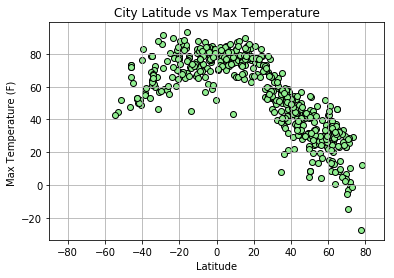

In [63]:
plt.scatter(weather_info["lat"], weather_info["temp"], marker="o", color="lightgreen", edgecolor="black")


plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F) ")


plt.grid(True)
plt.xlim(-90,90)

plt.savefig("citylat_vs_maxtemp.png")

plt.show()

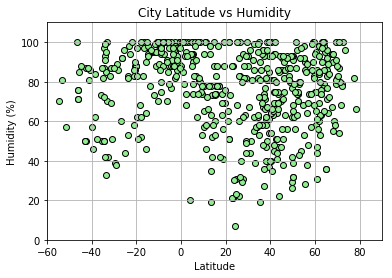

In [68]:
plt.scatter(weather_info["lat"], weather_info["humidity"], marker="o", color="lightgreen", edgecolor="black")


plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.xlim(-60,90)
plt.ylim(0,110)

plt.savefig("citylat_vs_hum.png")
plt.show ()

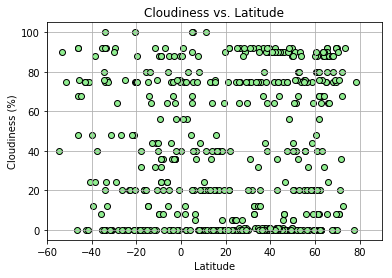

In [70]:
plt.scatter(weather_info["lat"], weather_info["cloudiness"], marker="o", color="lightgreen", edgecolor="black")

plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
plt.xlim(-60,90)


plt.savefig("cloudiness_vs_lat.png")
plt.show ()

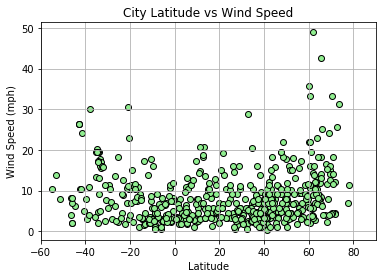

In [67]:
plt.scatter(weather_info["lat"], weather_info["winds"], marker="o", color="lightgreen", edgecolor="black")


plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.xlim(-60,90)


plt.savefig("citylat_vs_windsp.png")

plt.show()